In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

In [ ]:
df['region'].value_counts().to_frame()

In [6]:
df.reset_index(inplace=True)
df.set_index('index', inplace=True)

In [7]:
labelencoder = LabelEncoder()

In [8]:
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df = pd.get_dummies(data=df, columns=['region'])

In [9]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
index,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0


In [10]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [11]:
Spearman_correlation_matrix = df.corr(method='spearman')
Spearman_correlation_matrix

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020809,0.107736,0.056992,-0.025210,0.534392,-0.000149,0.002683,-0.015273,0.013315
sex,-0.020809,1.000000,0.044802,0.015589,0.076185,0.009490,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.107736,0.044802,1.000000,0.015607,0.002203,0.119396,-0.133115,-0.127168,0.249037,0.001710
children,0.056992,0.015589,0.015607,1.000000,0.016583,0.133339,-0.025690,0.034465,-0.019531,0.011466
smoker,-0.025210,0.076185,0.002203,0.016583,1.000000,0.663460,0.002811,-0.036945,0.068498,-0.036945
charges,0.534392,0.009490,0.119396,0.133339,0.663460,1.000000,0.046109,-0.021634,0.017275,-0.042354
region_northeast,-0.000149,-0.002425,-0.133115,-0.025690,0.002811,0.046109,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,0.002683,-0.011156,-0.127168,0.034465,-0.036945,-0.021634,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.015273,0.017117,0.249037,-0.019531,0.068498,0.017275,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.013315,-0.004184,0.001710,0.011466,-0.036945,-0.042354,-0.320177,-0.320829,-0.346265,1.000000


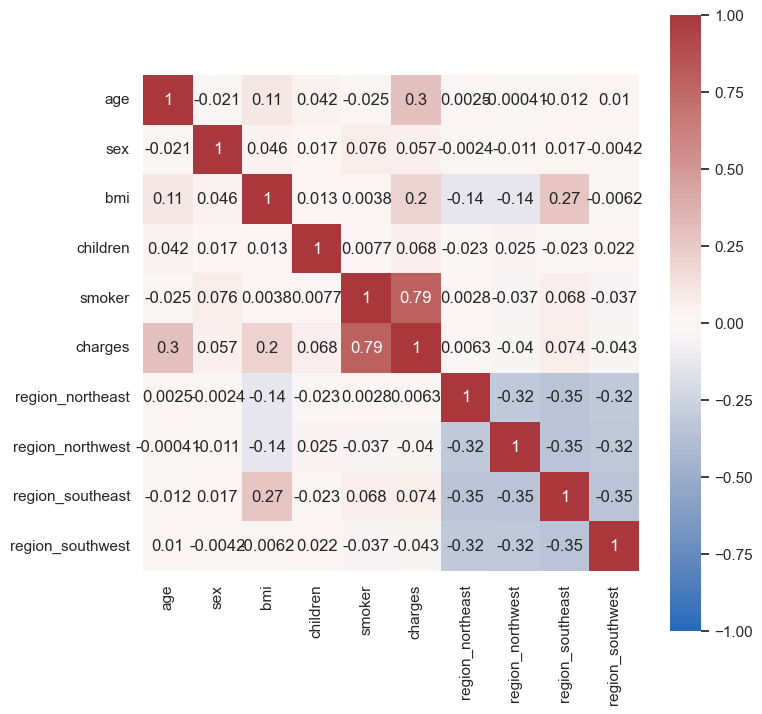

In [12]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

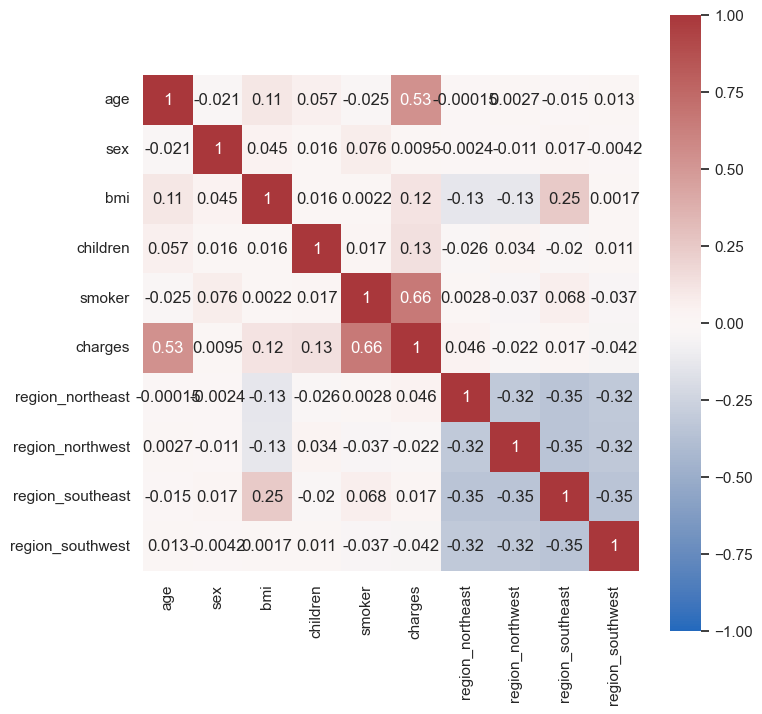

In [13]:
sns.set(rc={'figure.figsize':(8,8)}) 

sns.heatmap(
    Spearman_correlation_matrix,
    cmap='vlag',
    vmin=-1.,
    vmax=1., 
    square=True,
    annot=True
    ) 
#sns.color_palette("vlag", as_cmap=True)
pass

In [14]:
df.isnull().values.any()

False

In [15]:
bmi = pd.DataFrame(
    [
    {"BMI": "< 18.5", "Condition": "Underweight"},
    {"BMI": "18.5 - 24.9", "Condition": "Healthy weight"},
    {"BMI": "25.0 - 29.9", "Condition": "Overweight"},
    {"BMI": "35 > X > 30", "Condition": "Obesity, class 1"},
    {"BMI": "40 > X > 35", "Condition": "Obesity, class 2"},
    {"BMI": "< 40", "Condition": "Obesity, class 3"}
    ]
)
bmi

,BMI,Condition
0,< 18.5,Underweight
1,18.5 - 24.9,Healthy weight
2,25.0 - 29.9,Overweight
3,35 > X > 30,"Obesity, class 1"
4,40 > X > 35,"Obesity, class 2"
5,< 40,"Obesity, class 3"


In [16]:
conditions = [
    (df['bmi'] >= 0) & (df['bmi'] < 25),
    (df['bmi'] >= 25) & (df['bmi'] < 30),
    (df['bmi'] >= 30) & (df['bmi'] < 35),
    (df['bmi'] >=35) & (df['bmi'] < 40),
    (df['bmi'] >= 40) & (df['bmi'] < 45),
    (df['bmi'] >= 45)
]

results = ['Underweight', 'Healthy weight', 'Overweight', 'Obesity, class 1', 'Obesity, class 2', 'Obesity, class 3']

df['BMI'] = np.select(conditions, results)

In [17]:
df['BMI'].value_counts().to_frame()

,BMI
Overweight,391
Healthy weight,386
Underweight,245
"Obesity, class 1",225
"Obesity, class 2",71
"Obesity, class 3",20


In [18]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,19,0,27.900,0,1,16884.92400,0,0,0,1,Healthy weight
1,18,1,33.770,1,0,1725.55230,0,0,1,0,Overweight
2,28,1,33.000,3,0,4449.46200,0,0,1,0,Overweight
3,33,1,22.705,0,0,21984.47061,0,1,0,0,Underweight
4,32,1,28.880,0,0,3866.85520,0,1,0,0,Healthy weight


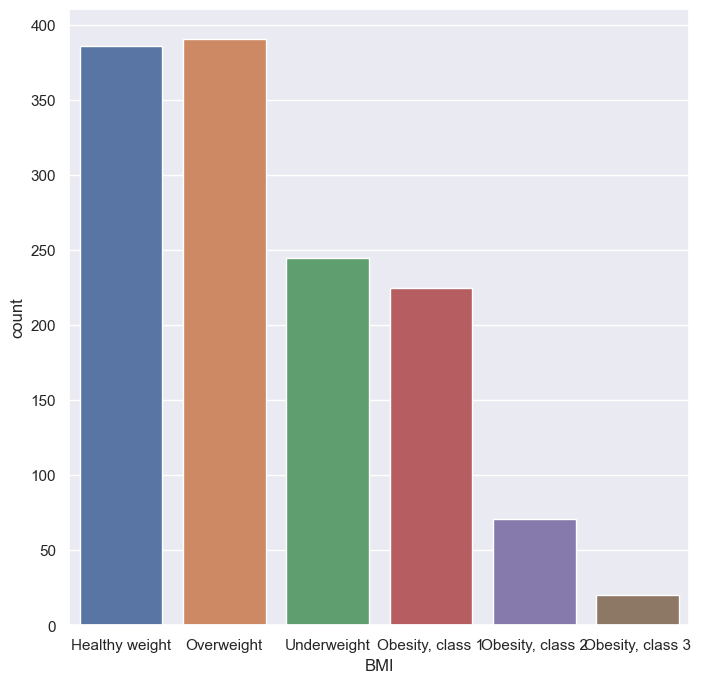

In [19]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['BMI'])
plt.title('Classification by BMI')

plt.show();

In [20]:
df['smoker'].value_counts().to_frame()

,smoker
0,1064
1,274


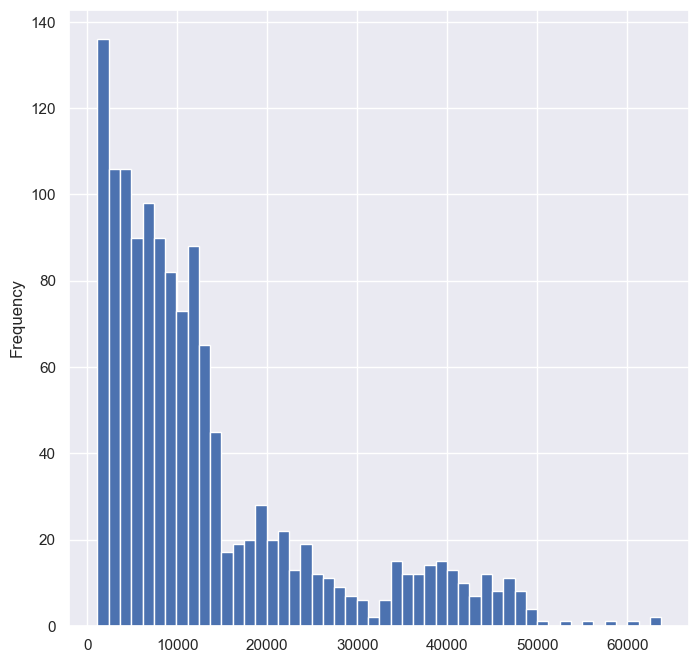

In [21]:
df['charges'].plot(kind='hist', bins=50);

Wartości po zlogarytmowaniu

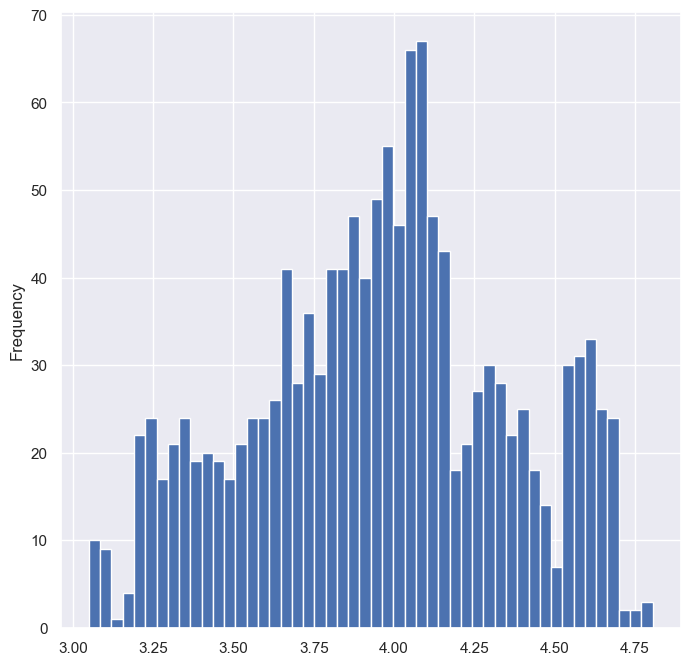

In [22]:
np.log10(df['charges']).plot(kind='hist', bins=50);

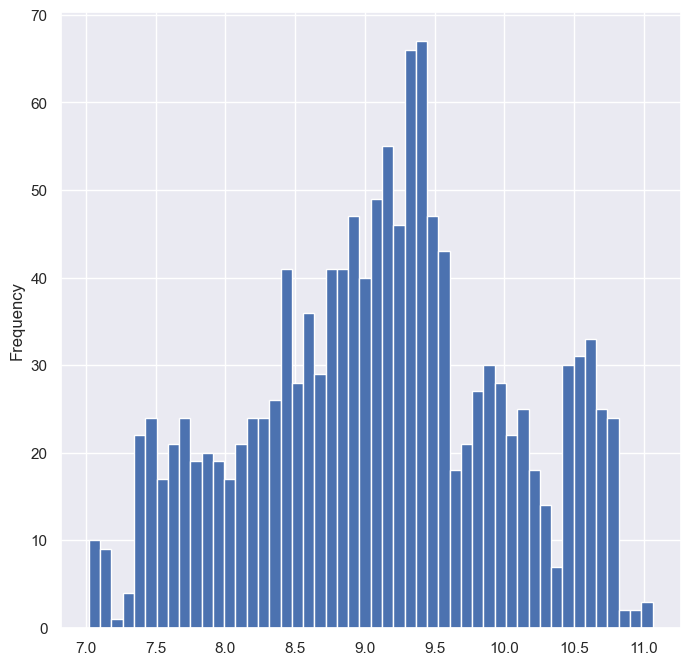

In [23]:
np.log(df['charges']).plot(kind='hist', bins=50);

In [24]:
nosmoke = df[df['smoker']==0]
smoke = df[df['smoker']==1]

In [25]:
nosmoke['charges']

index
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

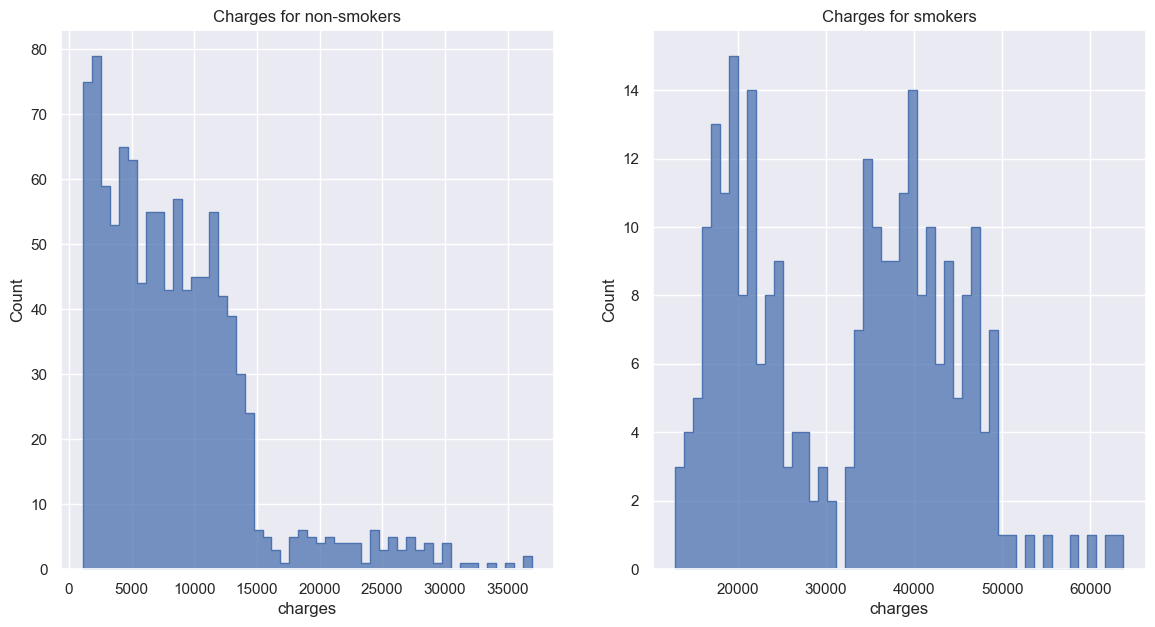

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(nosmoke['charges'], ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

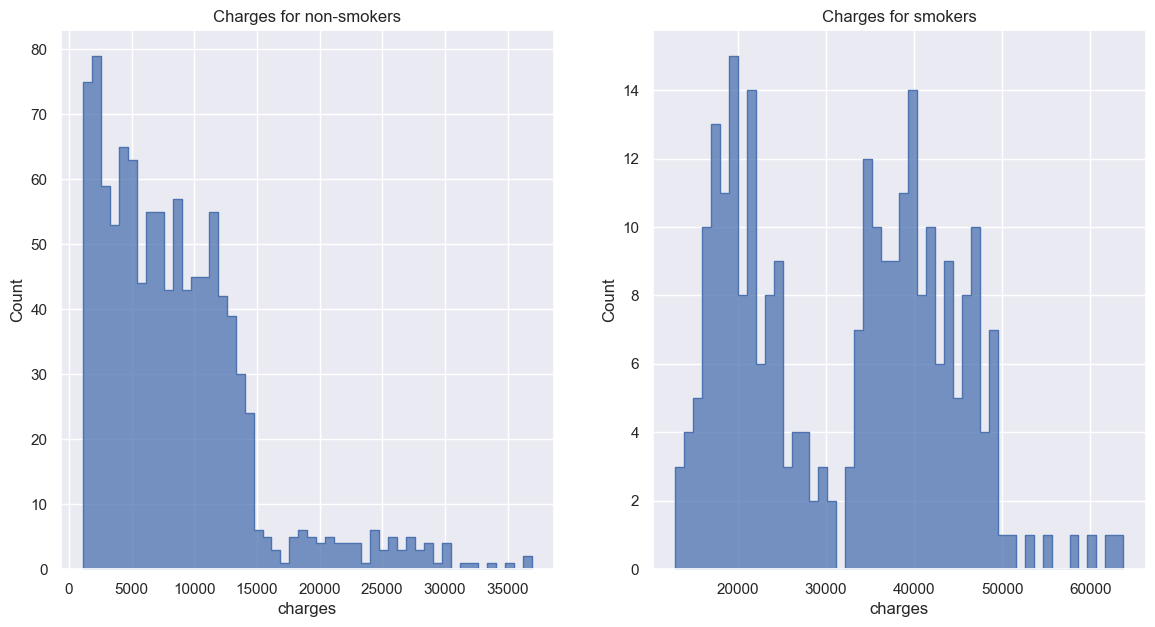

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
sns.histplot(data=nosmoke, x='charges', ax=axes[0], bins=50, element="step")
axes[0].set_title('Charges for non-smokers')
sns.histplot(x='charges', data=smoke, ax=axes[1], bins=50, element="step")
axes[1].set_title('Charges for smokers')
plt.style.use('seaborn-deep')
plt.show()

In [28]:
df['sex'].value_counts().to_frame('Count')

,Count
1,676
0,662


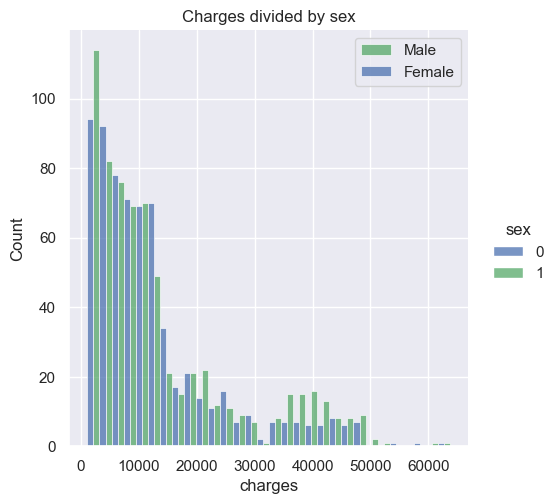

In [29]:
sns.displot(df, x='charges', hue='sex', multiple='dodge')
plt.title('Charges distribution divided by sex')
plt.legend(['Male','Female'])

plt.show()

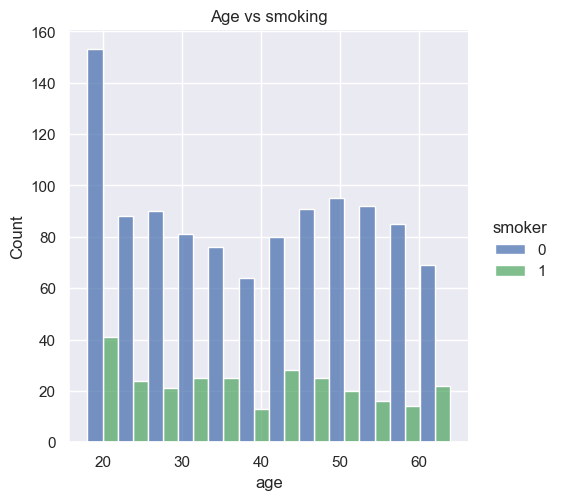

In [30]:
sns.displot(df, x='age', hue='smoker', multiple='dodge')
plt.title('Age vs smoking')

plt.show()

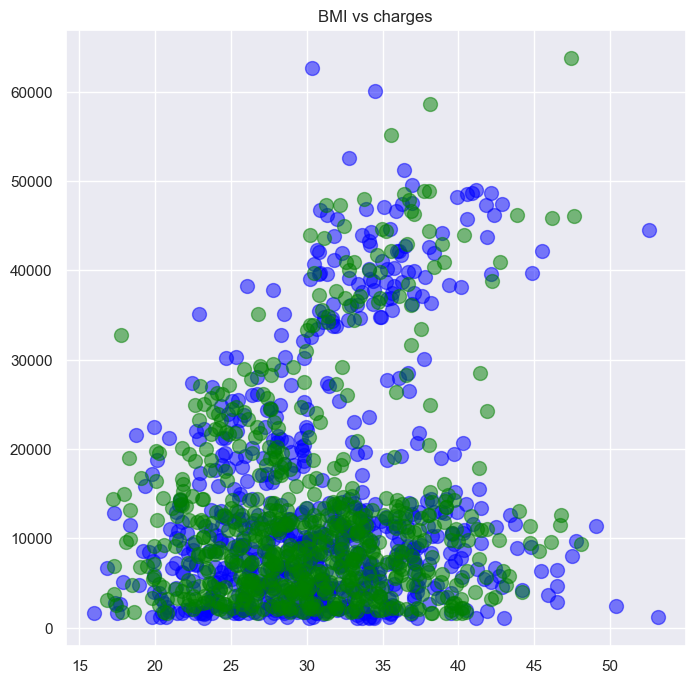

In [31]:
female = df[df['sex']==0]
male = df[df['sex']==1]
plt.scatter(male['bmi'], male['charges'],s=100, color='blue', alpha=0.5)
plt.scatter(female['bmi'], female['charges'],s=100, color='green', alpha=0.5)
plt.title('BMI vs charges')
plt.show()

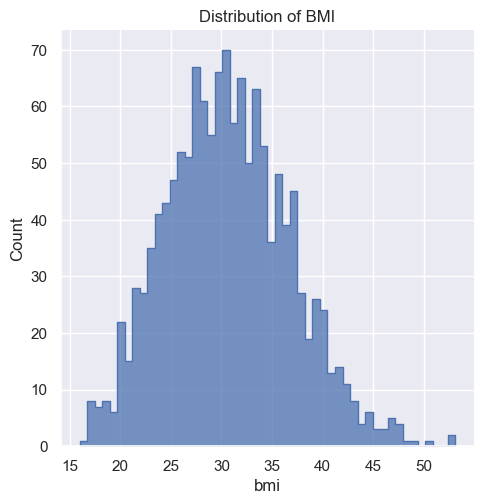

In [32]:
sns.displot(df, x='bmi',element='step', bins=50)
plt.title('Distribution of BMI')
plt.show()

In [ ]:
df['children'].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid", palette="pastel")
sns.countplot(x=df['children'])
plt.title('Number of children')

plt.show();

In [ ]:
plt.scatter(df['charges'], df['children'],s=100, color='green', alpha=0.3)
plt.title('Children vs charges')
plt.show()

***Modele*** Regresja liniowa, random forest, SVR, poszukać innych - np. regresja wielomianowa

***Miary sukcesu***
RMSE, r^2, MAE, MAPE, wizualizacja na scatter plocie

<h2>Modelowanie<h2/>

In [33]:
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit, cross_val_score


Agnieszka

In [34]:
#Skalowanie
scaler=StandardScaler()
df[['age','bmi','children']]=scaler.fit_transform(df[['age','bmi','children']])

In [35]:
X=df.drop(["charges","BMI"],axis='columns') #charges opłaty jako y więc dropuje, BMI jest kategoryczna więc też ją muszę usunąć
y=df['charges'] #y zmienna objaśniana, tą zmienną chcę przewidzieć


## Regresja liniowa

In [52]:
#train_test_split dzięlę na dane testowe i trenujące w proporcji "kciuka"
X_test, X_train, y_test, y_train =train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test,y_test)


0.732199873592103

In [54]:
lr.intercept_

8680.929381338989

In [55]:
lr.coef_

array([ 3779.68178003,  -722.5034812 ,  2165.76471218,   753.55993013,
       24955.13358071,  1023.8984811 ,   296.01546495,  -499.96893849,
        -819.94500755])

## Las losowy (random forest rf)

In [56]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv = 5)
print("Accuracy score dla Randam forest: ", rf_scores)
print("Average accuracy score dla Randam forest: ", rf_scores.mean())

Accuracy score dla Randam forest:  [0.85622856 0.87626001 0.89611863 0.76275288 0.80896032]
Average accuracy score dla Randam forest:  0.8400640817536438


In [57]:
#strojenie parametrów
def znajdz_najlepszy_model_gridsearchcv(X,y): 
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
            
        },
        'randomforest_regressor':{
            'model':RandomForestRegressor(),
            'params':{
                'n_estimators':[150]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

znajdz_najlepszy_model_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.768172,{'normalize': True}
1,lasso,0.767686,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.760610,"{'criterion': 'mse', 'splitter': 'best'}"
3,randomforest_regressor,0.868609,{'n_estimators': 150}


## Predykcja

In [58]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

Root Mean Squared Error (RMSE): 4941.1248594087465
Mean Squared Error (MSE): 24414714.8762671
R-squared (R2) Score: 0.8297037703407975


In [59]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(metrics.r2_score(y_test, predictions))

0.8282588360530685


In [63]:
importances = rf.feature_importances_
feature_names = X_train.columns.tolist()

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

fig = px.bar(feature_importances, x='feature', y='importance')
fig.show() # wykres pokazujący jaki wpływ na koszty mają poszczególne cechy objaśniające

## DO WNIOSKÓW NA KONIEC

- Przeanalizowaliśmy zbiór danych dotyczących kosztów leczenia, zawierający informacje takie jak wiek, płeć, BMI, liczba dzieci, status palacza, region i opłaty medyczne. 
- Przeprowadziliśmy różne techniki analizy danych m.in korelację między różnymi cechami zobrazowaliśmy znaczenie tych cech za pomocą różnych narzędzi do wizualizacji tj np. scater plot, barplot.

- Wygenerowaliśmy również modelr regresji, takich jak regresja liniowa, regresja lasso, drzewo decyzyjne i regresja lasów losowych, aby przewidzieć opłaty medyczne. 
- Po ocenie wydajności wszystkich modeli przy użyciu walidacji krzyżowej stwierdziliśmy, że model regresji lasów losowych zapewnia najlepsze wyniki pod względem dokładności.

- Wartość pierwiastka średniokwadratowego błędu (RMSE) wynosząca 4915.43 wskazuje, że przewidywane w modelu wartości opłat różnią się średnio o 4915.43 USD od rzeczywistych wartości opłat. Średni błąd kwadratowy (MSE) wynoszący 24161467.282 reprezentuje średnią kwadratów różnic między przewidywanymi a rzeczywistymi wartościami opłat. Wynik R-kwadrat (R2) wynoszący  0.8314 wskazuje, że około 83,14% zmienności można wytłumaczyć cechami zastosowanymi w modelu.

- Ogólnie rzecz biorąc, te wskaźniki oceny sugerują, że model Random Forest Regressor dobrze sprawdził się w przewidywaniu opłat medycznych na podstawie dostarczonego zestawu danych. Wykreśliliśmy również wizualną interpretację najważniejszych cech w zbiorze danych do przewidywania obciążeń medycznych i okazało się, że palenie papierosów jest najważniejszą cechą w zbiorze danych.

- Podsumowując, możemy powiedzieć, że model Random Forest Regression może skutecznie przewidywać opłaty medyczne na podstawie zadanego zbioru danych.

 <h3>xgboost<h3/>

In [36]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,BMI
index,,,,,,,,,,,
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,0,0,0,1,Healthy weight
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,0,0,1,0,Overweight
2,-0.797954,1,0.383307,1.580926,0,4449.46200,0,0,1,0,Overweight
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,0,1,0,0,Underweight
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,0,1,0,0,Healthy weight


In [37]:
y = df['charges']
colx = ['age', 'sex', 'bmi', 'children', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']
x = df[colx]

In [38]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [40]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=20, 
    max_depth=6,
    subsample=0.5,
    colsample_bytree=1,
)

In [41]:
params= {
'n_estimators': range(1,50,5),
'max_depth': range(1,8,2),
'subsample': [0, 0.1, 0.25,0.5, 0.75, 1],
'colsample_bytree': [0, 0.1, 0.25,0.5, 0.75, 1],
'eta': [0, 0.1, 0.25,0.5, 0.75, 1],
}

In [42]:
from sklearn.model_selection import GridSearchCV

Strojenie parametrów - trwało to 30min, bo przesadziłam z ilością parametrów, ale coś tam wyszło.  
 Wyhaszowałam, żeby nie spowalniało całości, niżej model jest fitowany na parametrach z best_params

In [43]:
#xg_search = GridSearchCV(xg_reg, params, cv=5)
#xg_search.fit(x_train, y_train)

In [44]:
#xg_search.best_params_

In [45]:
#xg_search.best_score_

In [46]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=46, 
    max_depth=3,
    subsample=0.75,
    colsample_bytree=1,
    eta=0.1
)

In [47]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=46, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [48]:
y_pred = xg_reg.predict(x_test)
y_pred

array([ 6068.417 , 46719.004 , 24179.008 ,  5545.3677,  7980.141 ,
       17334.664 , 16278.787 ,  8176.029 ,  3728.5818, 35832.88  ,
       15960.753 , 37596.082 , 11828.233 ,  9828.892 ,  3179.248 ,
        8900.265 ,  4985.3916, 17986.19  ,  8789.884 ,  3322.6794,
        4925.9756,  2836.739 , 12415.7295, 14726.157 , 24408.812 ,
        4506.153 , 11103.49  ,  7227.785 ,  3763.2969, 17873.334 ,
        8924.816 , 16681.758 ,  5210.3804, 19735.812 , 10918.978 ,
        5414.8213, 13307.524 ,  2703.4736,  2762.3252, 35483.414 ,
        3014.1138,  3784.807 , 13514.168 ,  7758.0815, 18222.693 ,
        7599.4165,  5662.1245,  3863.8604,  8786.499 ,  8638.283 ,
       46962.152 ,  2708.419 ,  6657.047 , 14573.093 , 11793.317 ,
        5307.813 ,  7360.7983,  6522.8413,  4014.2236, 42061.918 ,
       39853.137 , 13321.563 , 23843.291 ,  2262.486 ,  5037.8105,
       38296.258 ,  7980.141 , 15081.471 , 13187.274 , 21058.016 ,
       13041.84  ,  2989.5056,  7252.5186, 34983.355 , 13292.6

In [49]:
xg_reg.score(x_test, y_test) 

0.8724057999903124

In [50]:
xg_reg.score(x_train, y_train)

0.8807509329349825

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
print("RMSE - gbtree: ", rmse)
print("MAE - gbtree: ", mae)

NameError: name 'sklearn' is not defined

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

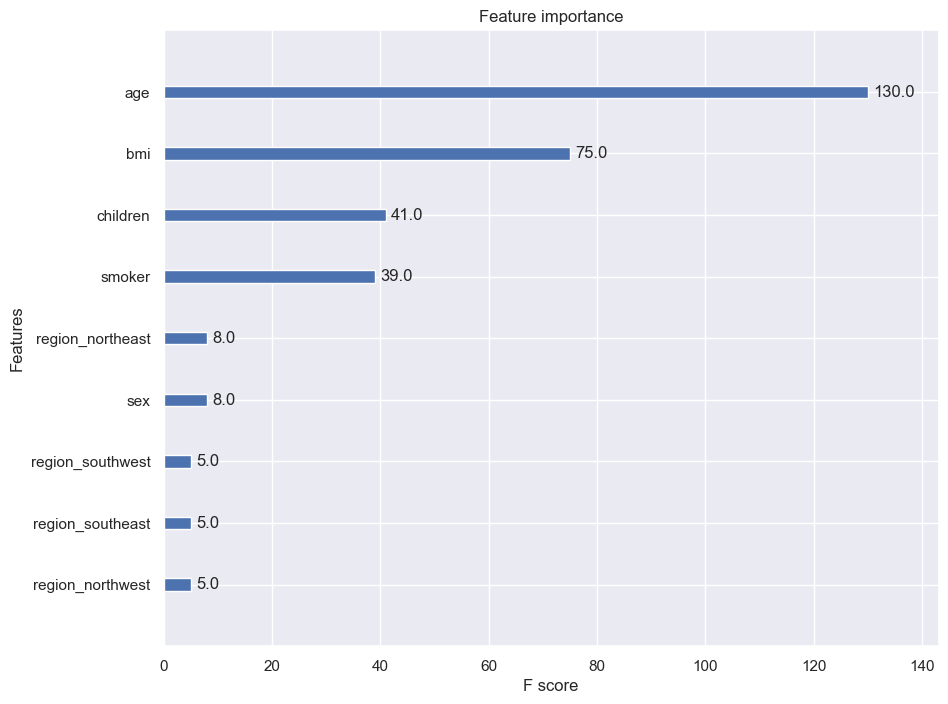

In [ ]:
rcParams['figure.figsize'] = 10, 8

xgb.plot_importance(xg_reg)

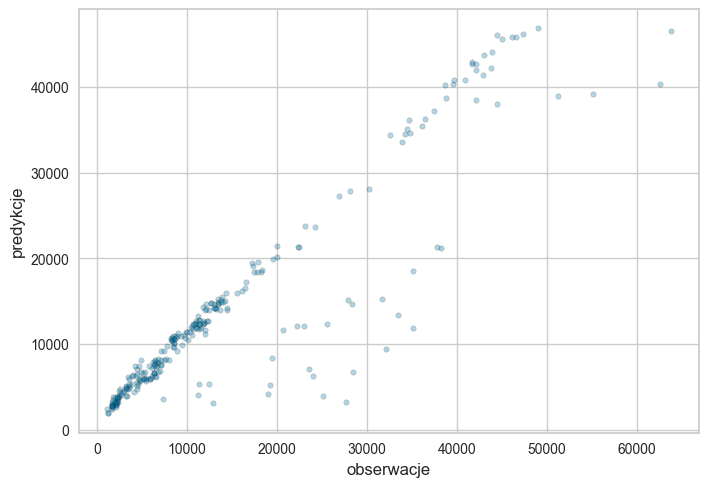

In [ ]:
plt.scatter(
    y_test,
    y_pred,
    edgecolor="black",
    s=15, 
    alpha = 0.3)
plt.xlabel("obserwacje")
plt.ylabel("predykcje");

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.83182635937251

In [ ]:
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error

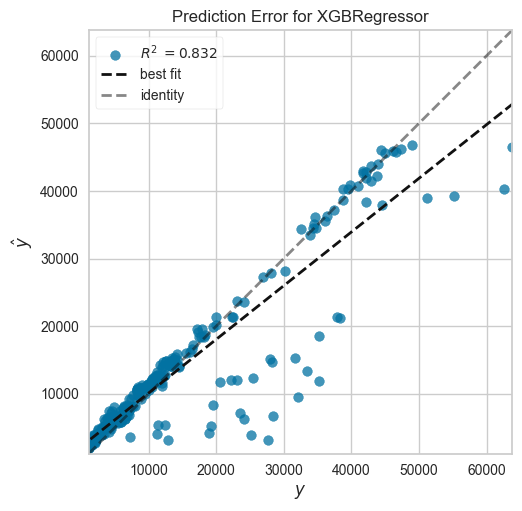

In [ ]:
prediction_error(xg_reg, x_train, y_train, x_test, y_test);

R^2 wynosi 83%, czyli nasz model uwzględnia taki procent wariancji dla zbioru.    
Czarna linia oznaczałaby najlepszy model, który najlepiej przewiduje kwoty. Nasz model jest dosyć blisko tej linii.

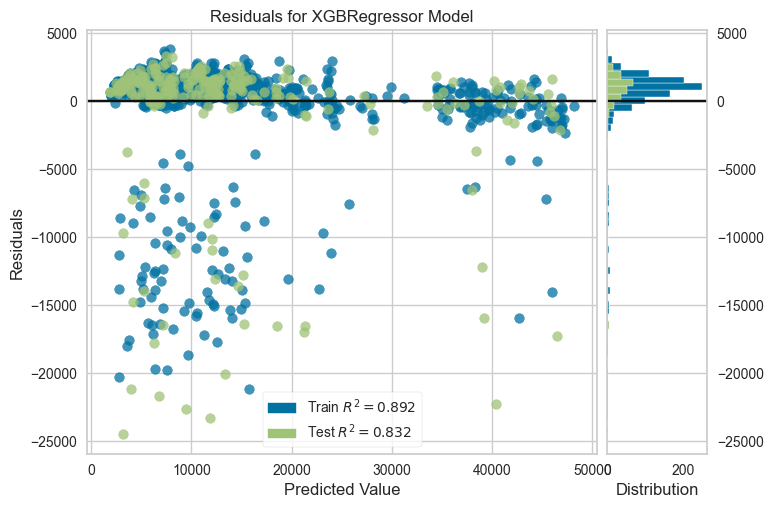

In [ ]:
residuals_plot(xg_reg, x_train, y_train, x_test, y_test);

Wnioski z wykresu? rozkład normalny reszt. Reszty są skupione głównie wokół 0, czyli model zazwyczaj mało się myli.  
Pozostała część reszt jest rozproszona, te mocniej odstające są częściej ujemne. 

Chciałam sprawdzić czy standaryzacja i PCA pomogą tutaj usprawnić model

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn import decomposition

In [ ]:
my_scaler = StandardScaler()
my_scaler.fit(x)
x = my_scaler.transform(x)


In [ ]:
x.shape

(1338, 9)

In [ ]:
pca = decomposition.PCA(n_components=4)

In [ ]:
X_std_pca = pca.fit_transform(x)

In [ ]:
X_std_pca.shape

(1338, 4)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_std_pca, y, test_size=0.2)

In [ ]:
xg_reg = xgb.XGBRegressor(
    random_state=123, 
    n_estimators=46, 
    max_depth=3,
    subsample=0.75,
    colsample_bytree=1,
    eta=0.1
)

In [ ]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=46, n_jobs=None, num_parallel_tree=None,
             predictor=None, ...)

In [ ]:
xg_reg.score(x_test, y_test) 

0.31641179868721947

<h2>XD<h2/>

In [ ]:
xg_reg.score(x_train, y_train)

0.6099076258499475